In [1]:
import json
import time
from base64 import b64decode
from io import BytesIO, StringIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic
from IPython.utils.capture import capture_output
from IPython.core.interactiveshell import InteractiveShell

from manim import *
scale_res=1
scale_res=4
params = f" -v WARNING -r {170*scale_res},{170*scale_res} -s  --disable_caching Example"
import PIL
cell_counter = 0

@register_cell_magic
def capture_png(line, cell):
    global cell_counter
    cell_counter += 1
    # init capturing cell output
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    argument_array = line.split('--style')
    post_path = argument_array[0].strip()
    chapter_name_underscore = chapter_name.replace(" ", "_")

    path = f"gallery_assets/{chapter_name_underscore}_{cell_counter:03}_{post_path}"

  #  path = path.split(".png")[0] + str(time.time_ns()) + ".png" time stemps not needed
    if not path:
        raise ValueError('No path found!')

    style = str(*argument_array[1:])
    style = style.strip()
    style = style.strip('"')  # remove quotes

    default_style = ""

    style = default_style + style

    raw_code_block = cell
    code_block = ""

    for codeline in StringIO(raw_code_block):
        if "#NOT" in codeline:
            pass
        else:
            code_block += codeline
    
    new_codeblock = ""
    for codeline in StringIO(code_block):
        if "#ONLY" in codeline:
            codeline= codeline.replace("#ONLY", "") 
            if codeline.startswith("        "): # delete the indention for manim -> TODO this can be made prettier!
                codeline = codeline[8:]

            new_codeblock += codeline
        else:
            pass
    
    if new_codeblock: # checks if there are lines that include "#ONLY"
        code_block = new_codeblock

    code_block = code_block.replace("'", "&#39;") # make sure that javascript can read the single quote character
    code_block = code_block.strip("\n")

    with open(joson_file_path, "r") as jsonFile:
            data = json.load(jsonFile)

    if not chapter_name in data:
        data[chapter_name] = []

    chapter_content = data[chapter_name]
    chapter_content.append(
        {"image_path": path,
        "celltype": "Normal",
        "css": style,
        "code": code_block})

    data[chapter_name] = chapter_content
    with open(joson_file_path, "w") as jsonFile:
        json.dump(data, jsonFile, indent=2, sort_keys=False)

    shell = InteractiveShell.instance()
    # save the output
    with capture_output(stdout=False, stderr=False, display=True) as result:
        shell.run_cell(cell) # idea by @krassowski 

    # save image
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')


joson_file_path = "gallery_assets/gallery_parameters.json"
chapter_name = "ManimEmoji"

Manim Community v0.16.0.post0

In [2]:
Text.set_default(color=BLACK)

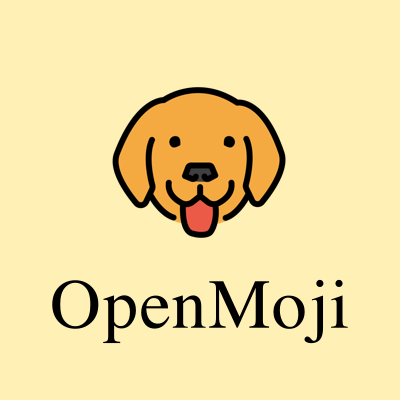

In [3]:
%%capture_png Axes_e_x.png  --style "width: 170px; height: auto;"
%%manim -v WARNING --disable_caching -qm -r400,400 Example1
from manim import *
from PIL import Image
import numpy as np
import requests
from pathlib import Path


class EmojiImageMobject(ImageMobject):
    def __init__(self, emoji, **kwargs):
        emoji_code = "-".join(f"{ord(c):x}" for c in emoji)
        emoji_code = emoji_code.upper()  # <-  needed for openmojis
        url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/618x618/{emoji_code}.png"
        im = Image.open(requests.get(url, stream=True).raw)
        emoji_img = np.array(im.convert("RGBA"))
        ImageMobject.__init__(self, emoji_img, **kwargs)


class Example1(Scene):
    def construct(self):
        self.camera.background_color = YELLOW_A
        em = EmojiImageMobject("🐶").scale(1.1)
        # when using OpenEmoji, please give credits e.g. like this:
        # "All emojis designed by OpenMoji – the open-source emoji and icon project. License: CC BY-SA 4.0"
        t = Text("OpenMoji").scale(2.5)
        Group(em, t).arrange(DOWN).scale(1.5)
        self.add(em, t)

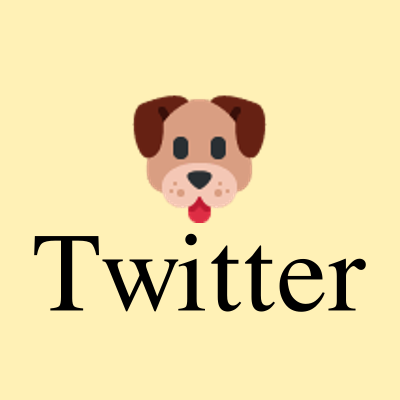

In [4]:
%%capture_png Axes_e_x.png  --style "width: 170px; height: auto;"
%%manim -v WARNING --disable_caching -qm -r400,400 Example1

from manim import *
from PIL import Image
import numpy as np
import urllib.request
from pathlib import Path


class EmojiImageMobject(ImageMobject):
    def __init__(self, emoji, **kwargs):
        emoji_code = "-".join(f"{ord(c):x}" for c in emoji)
        url = f"https://raw.githubusercontent.com/twitter/twemoji/master/assets/72x72/{emoji_code}.png"
        im = Image.open(requests.get(url, stream=True).raw)
        emoji_img = np.array(im.convert("RGBA"))
        ImageMobject.__init__(self, emoji_img, **kwargs)


class Example1(Scene):
    def construct(self):
        self.camera.background_color = YELLOW_A
        em = EmojiImageMobject("🐶").scale(6)
        t = Text("Twitter").scale(4)
        Group(em, t).arrange(DOWN).scale(1.5)
        self.add(em, t)

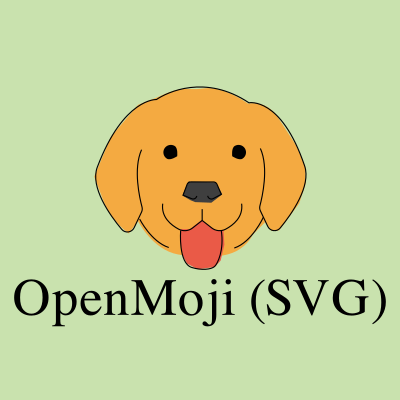

In [5]:
%%capture_png Axes_e_x.png  --style "width: 170px; height: auto;"
%%manim -v WARNING --disable_caching -qm -r400,400 Example1

from manim import *
from PIL import Image
import numpy as np
import urllib.request
from pathlib import Path


class EmojiSVGMobject(SVGMobject):
    def __init__(self, emoji, **kwargs):
        emoji_code = "-".join(f"{ord(c):x}" for c in emoji)
        emoji_code = emoji_code.upper()  # <-  needed for openmojis
        url = f"https://raw.githubusercontent.com/hfg-gmuend/openmoji/master/color/svg/{emoji_code}.svg"
        path_svg = Path.cwd() / f"{emoji_code}.svg"
        urllib.request.urlretrieve(url, path_svg)
        SVGMobject.__init__(self, str(path_svg), **kwargs)
        path_svg.unlink()  # delete downloaded svg again locally


class Example1(Scene):
    def construct(self):
        self.camera.background_color = GREEN_A
        em = EmojiSVGMobject("🐶").scale(2.5)
        t = Text("OpenMoji (SVG)").scale(2)
        Group(em, t).arrange(DOWN).scale(1.4)
        self.add(em, t)

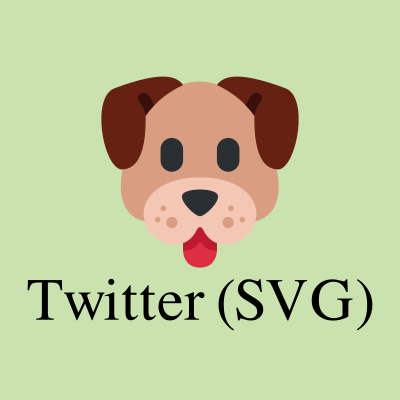

In [6]:
%%capture_png Axes_e_x.png  --style "width: 170px; height: auto;"
%%manim -v WARNING --disable_caching -qm -r400,400 Example1

from manim import *
from PIL import Image
import numpy as np
import urllib.request
from pathlib import Path


class EmojiSVGMobject(SVGMobject):
    def __init__(self, emoji, **kwargs):
        emoji_code = "-".join(f"{ord(c):x}" for c in emoji)
        url = f"https://raw.githubusercontent.com/twitter/twemoji/master/assets/svg/{emoji_code}.svg"
        path_svg = Path.cwd() / f"{emoji_code}.svg"
        urllib.request.urlretrieve(url, path_svg)
        SVGMobject.__init__(self, str(path_svg), **kwargs)
        path_svg.unlink()  # delete downloaded svg again locally


class Example1(Scene):
    def construct(self):
        self.camera.background_color = GREEN_A
        em = EmojiSVGMobject("🐶").scale(2.2)
        t = Text("Twitter (SVG)").scale(2)
        Group(em, t).arrange(DOWN).scale(1.6)
        self.add(em, t)

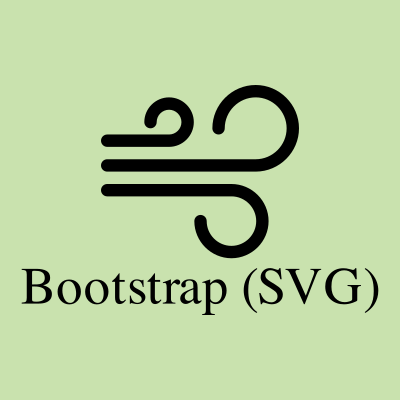

In [7]:
%%capture_png Axes_e_x.png  --style "width: 170px; height: auto;"
%%manim -v WARNING --disable_caching -qm -r400,400 Example1

from manim import *
from PIL import Image
import numpy as np
import urllib.request
from pathlib import Path


class BootstrapSVGMobject(SVGMobject):
    def __init__(self, emoji, color=BLACK, **kwargs):
        url = f"https://raw.githubusercontent.com/twbs/icons/main/icons/{emoji}.svg"
        path_svg = Path.cwd() / f"{emoji}.svg"
        urllib.request.urlretrieve(url, path_svg)
        path_svg.write_text(path_svg.read_text().replace("currentColor", color))
        SVGMobject.__init__(self, str(path_svg), **kwargs)
        path_svg.unlink()  # delete downloaded svg again locally


class Example1(Scene):
    def construct(self):
        self.camera.background_color = GREEN_A
        em = BootstrapSVGMobject("wind", color=BLACK).scale(2.2)
        # more at https://icons.getbootstrap.com/
        t = Text("Bootstrap (SVG)").scale(2)
        Group(em, t).arrange(DOWN).scale(1.4)
        self.add(em, t)

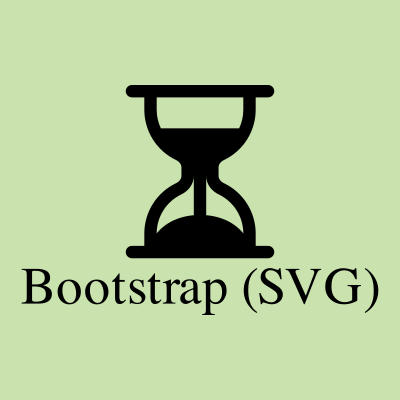

In [8]:
%%capture_png Axes_e_x.png  --style "width: 170px; height: auto;"
%%manim -v WARNING --disable_caching -qm -r400,400 Example1


class Example1(Scene):
    def construct(self):
        self.camera.background_color = GREEN_A
        em = BootstrapSVGMobject("hourglass-split", color=BLACK).scale(2.2)
        # more at https://icons.getbootstrap.com/
        t = Text("Bootstrap (SVG)").scale(2)
        Group(em, t).arrange(DOWN).scale(1.4)
        self.add(em, t)